In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\kadah\Downloads\bank\bank-full.csv")

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.shape

(45211, 17)

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

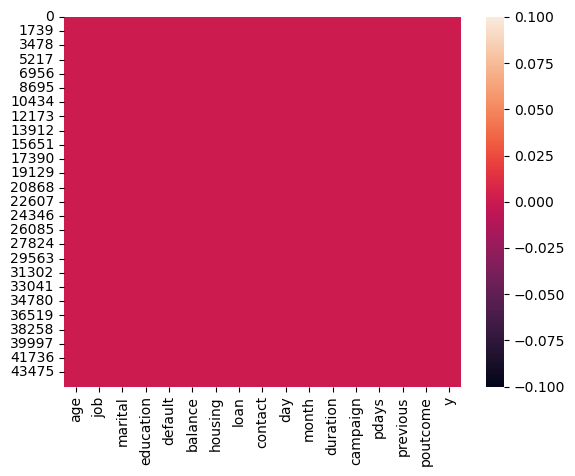

In [9]:
sns.heatmap(df.isnull())

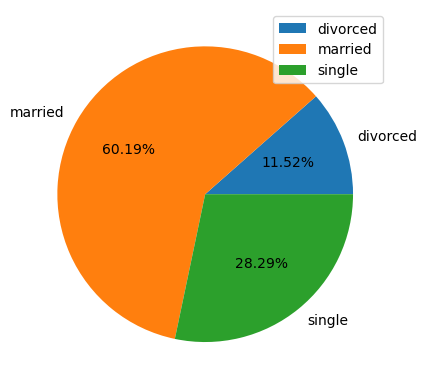

In [10]:
b=df.groupby("marital")["marital"].count()
plt.pie(b,labels=b.index,autopct="%.2f%%")
plt.legend()
plt.show()

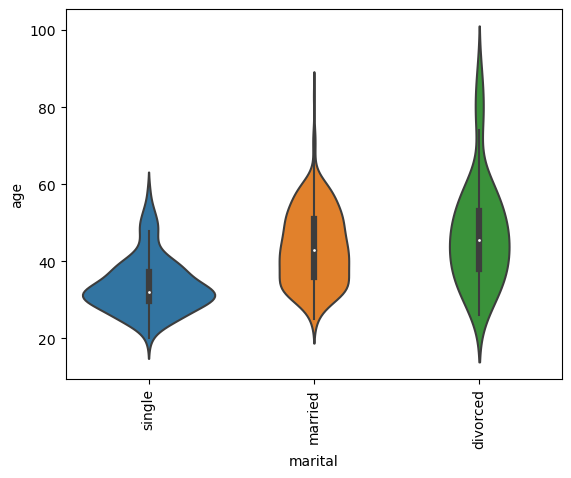

In [11]:
x=df.sample(500)
sns.violinplot(x="marital",y="age",data=x)
plt.xticks(rotation=90)
plt.show()

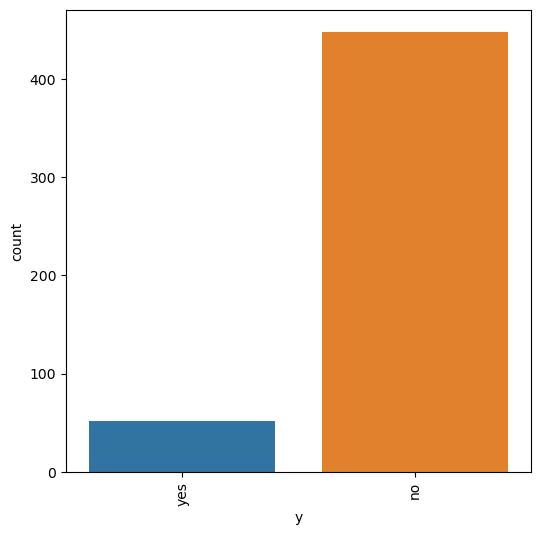

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='y',data=x)
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='balance'>

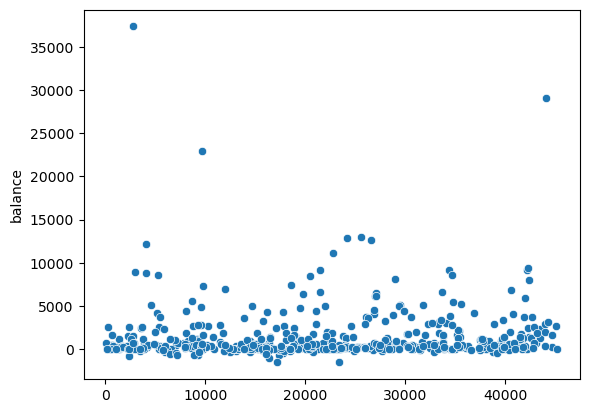

In [13]:
sns.scatterplot(x.balance)

<Axes: xlabel='age', ylabel='balance'>

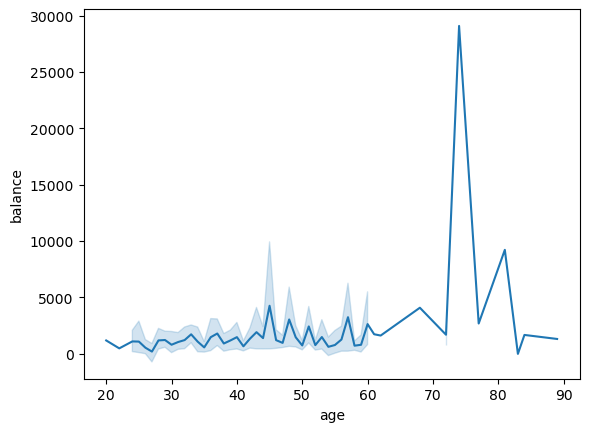

In [14]:
sns.lineplot(x='age', y='balance', data=x)

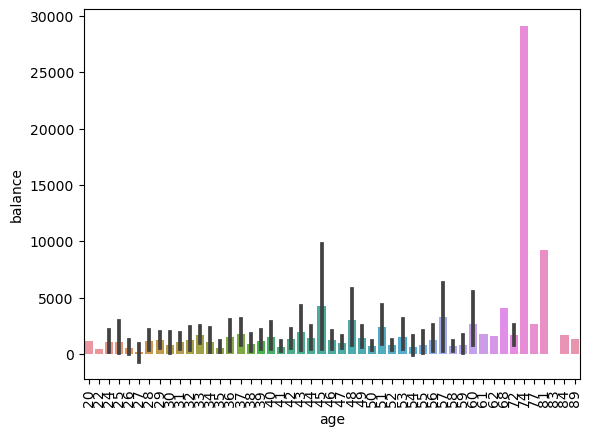

In [15]:
sns.barplot(y='balance', x='age',data=x, orient='v')
plt.xticks(rotation=90)
plt.show()

<Axes: >

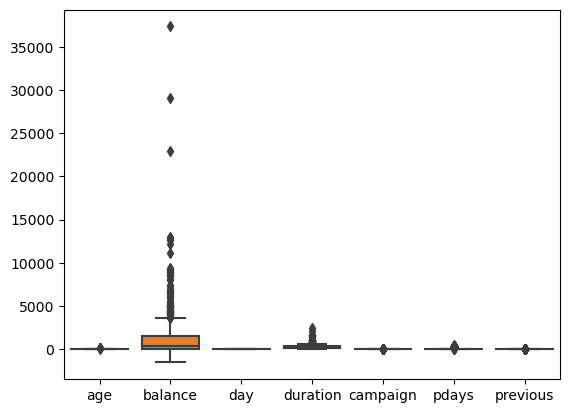

In [16]:
sns.boxplot(x)

In [17]:
from scipy import stats
z_scores=stats.zscore(df["balance"])
z_scores=stats.zscore(df["duration"])
z_score_outliers=(z_scores<-3)|(z_scores>3)

In [18]:
z_score_outlier_rows=df[z_score_outliers]
print("outliers detected by Z-score:",z_score_outlier_rows)

outliers detected by Z-score:        age          job   marital  education default  balance housing loan  \
37      53   technician   married  secondary      no       -3      no   no   
43      54      retired   married  secondary      no      529     yes   no   
59      46     services   married    primary      no      179     yes   no   
83      59       admin.   married  secondary      no     2343     yes   no   
86      56       admin.   married  secondary      no       45      no   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
45031   42   unemployed   married  secondary      no     1289      no   no   
45072   54   management  divorced   tertiary      no     5475      no   no   
45199   34  blue-collar    single  secondary      no     1475     yes   no   
45200   38   technician   married  secondary      no      557     yes   no   
45208   72      retired   married  secondary      no     5715      no   no   

        contact  day month  durat

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [20]:
df.drop(['contact', 'poutcome'], axis=1, inplace=True)
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day month  duration  campaign  pdays  previo

In [21]:
encoder = LabelEncoder()

In [22]:
df['job'] = encoder.fit_transform(df['job'])

df['marital'] = encoder.fit_transform(df['marital'])

df['education'] = encoder.fit_transform(df['education'])

df['default'] = encoder.fit_transform(df['default'])

df['housing'] = encoder.fit_transform(df['housing'])

df['loan'] = encoder.fit_transform(df['loan'])

df['month'] = encoder.fit_transform(df['month'])

df['y'] = encoder.fit_transform(df['y'])

In [23]:
x = df.drop('y',axis=1)
y = df['y']

In [24]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [25]:
scale=StandardScaler()
s_train = scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
classi = DecisionTreeClassifier(random_state = 2)
classi.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2)

In [27]:
y_pred = classi.predict(x_test)

In [28]:
acc = accuracy_score(y_test,y_pred)

In [29]:
print(f"Accuracy:{acc:.2f}")

Accuracy:0.86


In [30]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      7990
           1       0.06      0.01      0.02      1053

    accuracy                           0.86      9043
   macro avg       0.47      0.49      0.47      9043
weighted avg       0.79      0.86      0.82      9043



In [31]:
y_pred = classi.predict(x_test)  
print(y_pred)

[0 0 0 ... 0 0 0]


In [32]:
y_pred=classi.predict(x_test)


from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)


y_pred_train=classi.predict(x_train)
cm_train = confusion_matrix(y_pred_train,y_train)


In [33]:
print()
print("Accuracy for training set for DT={}".format((cm_train[0][0]+cm_train[1][1])/len(y_train)))
print("Accuracy for testing set for DT={}".format((cm_train[0][0]+cm_train[1][1])/len(y_test)))


Accuracy for training set for DT=1.0
Accuracy for testing set for DT=3.999557668915183
